In [1]:
import pandas as pd
import numpy as np
import keras
from datetime import datetime
%matplotlib inline

Using TensorFlow backend.


In [2]:
training_keras = pd.read_csv("Train.csv")
testing_keras = pd.read_csv("test.csv")
train1 = training_keras.values
test1 = testing_keras.values

In [3]:
train2 = train1[:,1:9]
train3 = train1[:,11]

In [4]:
datetime_test= test1[:,0:1]
test2 = test1[:,1:9]
print (test1.shape)
print (datetime_test.shape)
print (test2.shape)

(6493, 9)
(6493, 1)
(6493, 8)


In [5]:
train2.shape

(10886, 8)

In [6]:
train3.shape

(10886,)

In [7]:
training_keras

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,1/1/2011 5:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,1/1/2011 6:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,1/1/2011 7:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,1/1/2011 8:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,1/1/2011 9:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [8]:
training_keras.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<b> Performaing EDA for datetime <b>

In [9]:
training_keras[training_keras.datetime.isnull()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


<b> Performing EDA for season <b>

In [10]:
training_keras[training_keras.season.isnull()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [11]:
training_keras.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

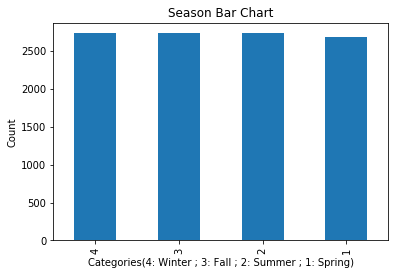

In [12]:
Season_plot = training_keras.season.value_counts().plot(kind = 'bar' )
Season_plot.set_title("Season Bar Chart")
Season_plot.set_xlabel("Categories(4: Winter ; 3: Fall ; 2: Summer ; 1: Spring)")
Season_plot.set_ylabel("Count")

As we can see from the bar chart, Spring season has comparatively less number of rentals than other seasons.

<b> Performing EDA for holiday <b>

In [13]:
training_keras[training_keras.holiday.isnull()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [14]:
training_keras.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

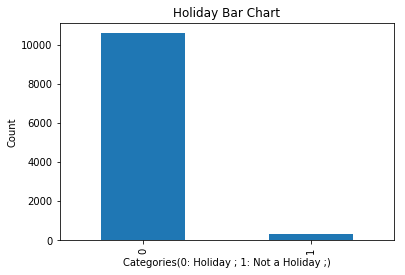

In [15]:
Holiday_plot = training_keras.holiday.value_counts().plot(kind = 'bar' )
Holiday_plot.set_title("Holiday Bar Chart")
Holiday_plot.set_xlabel("Categories(0: Holiday ; 1: Not a Holiday ;)")
Holiday_plot.set_ylabel("Count")

<b> Performing EDA for workingday <b>

In [16]:
training_keras[training_keras.workingday.isnull()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [17]:
training_keras.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

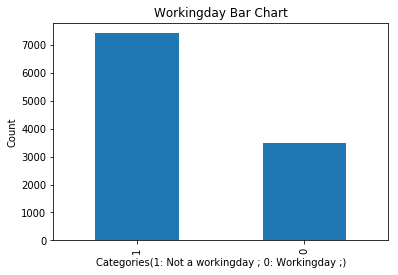

In [18]:
Workingday_plot = training_keras.workingday.value_counts().plot(kind = 'bar' )
Workingday_plot.set_title("Workingday Bar Chart")
Workingday_plot.set_xlabel("Categories(1: Not a workingday ; 0: Workingday ;)")
Workingday_plot.set_ylabel("Count")

<b> Performing EDA for weather <b>

In [19]:
training_keras[training_keras.weather.isnull()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [20]:
training_keras.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

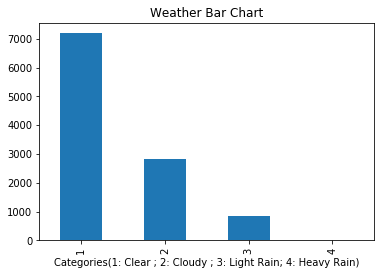

In [21]:
Weather_plot = training_keras.weather.value_counts().plot(kind = 'bar' )
Weather_plot.set_title("Weather Bar Chart")
Weather_plot.set_xlabel("Categories(1: Clear ; 2: Cloudy ; 3: Light Rain; 4: Heavy Rain)")
Holiday_plot.set_ylabel("Count")

<b> Performing EDA for temp <b>

In [22]:
training_keras[training_keras.temp.isnull()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [23]:
training_keras.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [24]:
training_keras.temp.value_counts()

14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
13.12    356
17.22    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
38.54      7
0.82       7
39.36      6
2.46       5
1.64       2
41.00      1
Name: temp, dtype: int64

Temp is a continous variable

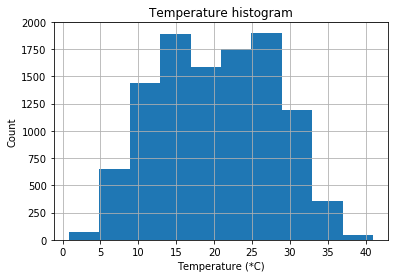

In [25]:
Temp_plot=training_keras.temp.hist(bins=10)
Temp_plot.set_title("Temperature histogram")
Temp_plot.set_xlabel("Temperature (*C)")
Temp_plot.set_ylabel("Count")

<b> Performing EDA for atemp <b>

In [26]:
training_keras[training_keras.atemp.isnull()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [27]:
training_keras.atemp.describe()

count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64

atemp is a continous variable.

In [28]:
training_keras.atemp.value_counts()

31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
16.665    381
25.000    365
33.335    364
21.210    356
30.305    350
15.150    338
21.970    328
24.240    327
17.425    314
31.820    299
34.850    283
27.275    282
32.575    272
11.365    271
14.395    269
29.545    257
19.695    255
15.910    254
12.880    247
13.635    237
34.090    224
12.120    195
28.790    175
23.485    170
10.605    166
35.605    159
9.850     127
18.180    123
36.365    123
37.120    118
9.090     107
37.880     97
28.030     80
7.575      75
38.635     74
6.060      73
39.395     67
6.820      63
8.335      63
18.940     45
40.150     45
40.910     39
5.305      25
42.425     24
41.665     23
3.790      16
4.545      11
43.940      7
43.180      7
2.275       7
3.030       7
44.695      3
0.760       2
1.515       1
45.455      1
Name: atemp, dtype: int64

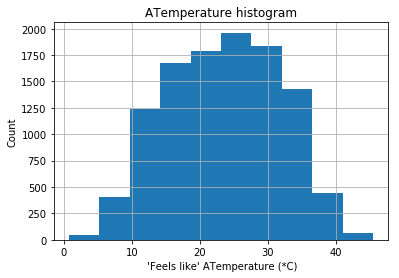

In [29]:
Atemp_plot=training_keras.atemp.hist(bins=10)
Atemp_plot.set_title("ATemperature histogram")
Atemp_plot.set_xlabel(" 'Feels like' ATemperature (*C)")
Atemp_plot.set_ylabel("Count")

<b> Performing EDA for humidity <b>

In [30]:
training_keras[training_keras.humidity.isnull()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [31]:
training_keras.humidity.value_counts()

88    368
94    324
83    316
87    289
70    259
65    253
46    247
66    246
77    244
49    234
55    224
52    218
56    208
69    207
93    205
61    205
62    202
82    200
74    197
73    195
43    193
78    192
50    190
53    186
41    184
59    178
81    174
58    168
40    167
54    164
     ... 
32     64
28     61
80     60
30     60
27     49
86     40
26     39
23     37
24     37
25     32
0      22
22     18
21     16
19     15
20     10
16      8
18      7
17      6
90      4
15      4
85      4
92      2
14      2
8       1
97      1
13      1
10      1
12      1
96      1
91      1
Name: humidity, Length: 89, dtype: int64

In [32]:
training_keras.humidity.describe()

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64

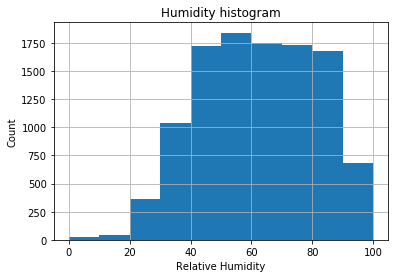

In [33]:
Humidity_plot=training_keras.humidity.hist(bins=10)
Humidity_plot.set_title("Humidity histogram")
Humidity_plot.set_xlabel("Relative Humidity")
Humidity_plot.set_ylabel("Count")

<b> Performing EDA for Windspeed <b>

In [34]:
training_keras[training_keras.windspeed.isnull()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [35]:
training_keras.windspeed.value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
50.0021       1
51.9987       1
Name: windspeed, dtype: int64

Windspeed is a continous variable.

In [36]:
training_keras.windspeed.describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

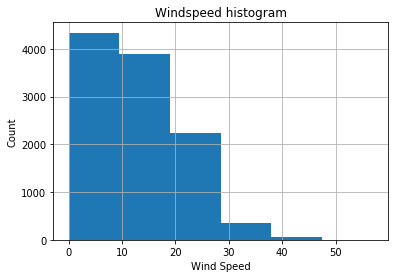

In [37]:
Windspeed_plot=training_keras.windspeed.hist(bins=6)
Windspeed_plot.set_title("Windspeed histogram")
Windspeed_plot.set_xlabel("Wind Speed")
Windspeed_plot.set_ylabel("Count")

In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy
from keras import losses
from keras.optimizers import SGD
from sklearn.model_selection import KFold

In [58]:
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
cvscores = []
sgd = SGD(lr=0.1, decay=1e-2, momentum=0.9)
for train, test in kfold.split(train2, train3):
  # create model
    model = Sequential()
    model.add(Dense(24, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))  
    model.compile(loss=losses.mean_squared_error, optimizer=sgd)
    model.fit(train2[train], train3[train], epochs=50, batch_size=20, verbose=1)
    # evaluate the model
    scores = model.evaluate(train2[test], train3[test], verbose=1)
    print("scores: %.2f%%" % (scores))
    cvscores.append(scores)
final_result=model.predict(test2)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

Epoch 1/50
9797/9797 [==============================] - 1s - loss: 1103342993533.7449     
Epoch 2/50
9797/9797 [==============================] - 0s - loss: 33345.1248     
Epoch 3/50
9797/9797 [==============================] - 0s - loss: 33287.8798     
Epoch 4/50
9797/9797 [==============================] - 0s - loss: 33258.3237     
Epoch 5/50
9797/9797 [==============================] - 0s - loss: 33275.2525     
Epoch 6/50
9797/9797 [==============================] - 0s - loss: 33209.5123     
Epoch 7/50
9797/9797 [==============================] - 0s - loss: 33218.9122     
Epoch 8/50
9797/9797 [==============================] - 0s - loss: 33211.6421     
Epoch 9/50
9797/9797 [==============================] - 0s - loss: 33211.0476     
Epoch 10/50
9797/9797 [==============================] - 0s - loss: 33200.2207     
Epoch 11/50
9797/9797 [==============================] - 0s - loss: 33193.4265     
Epoch 12/50
9797/9797 [==============================] - 0s - loss: 33167.871

9797/9797 [==============================] - 1s - loss: nan     
Epoch 2/50
9797/9797 [==============================] - 0s - loss: nan     
Epoch 3/50
9797/9797 [==============================] - 0s - loss: nan     
Epoch 4/50
9797/9797 [==============================] - 0s - loss: nan     
Epoch 5/50
9797/9797 [==============================] - 0s - loss: nan     
Epoch 6/50
9797/9797 [==============================] - 0s - loss: nan     
Epoch 7/50
9797/9797 [==============================] - 0s - loss: nan     
Epoch 8/50
9797/9797 [==============================] - 0s - loss: nan     
Epoch 9/50
9797/9797 [==============================] - 0s - loss: nan     
Epoch 10/50
9797/9797 [==============================] - 0s - loss: nan     
Epoch 11/50
9797/9797 [==============================] - 0s - loss: nan     
Epoch 12/50
9797/9797 [==============================] - 0s - loss: nan     
Epoch 13/50
9797/9797 [==============================] - 0s - loss: nan     
Epoch 14/50
9797/97

9797/9797 [==============================] - 1s - loss: nan     
Epoch 2/50
9797/9797 [==============================] - 0s - loss: nan     
Epoch 3/50
9797/9797 [==============================] - 0s - loss: nan     
Epoch 4/50
9797/9797 [==============================] - 0s - loss: nan     
Epoch 5/50
9797/9797 [==============================] - 0s - loss: nan     
Epoch 6/50
9797/9797 [==============================] - 0s - loss: nan     
Epoch 7/50
9797/9797 [==============================] - 0s - loss: nan     
Epoch 8/50
9797/9797 [==============================] - 0s - loss: nan     
Epoch 9/50
9797/9797 [==============================] - 0s - loss: nan     
Epoch 10/50
9797/9797 [==============================] - 0s - loss: nan     
Epoch 11/50
9797/9797 [==============================] - 0s - loss: nan     
Epoch 12/50
9797/9797 [==============================] - 0s - loss: nan     
Epoch 13/50
9797/9797 [==============================] - 0s - loss: nan     
Epoch 14/50
9797/97

9798/9798 [==============================] - 1s - loss: 5974037.5765     
Epoch 2/50
9798/9798 [==============================] - 0s - loss: 43256.7019     
Epoch 3/50
9798/9798 [==============================] - 0s - loss: 35341.4032     
Epoch 4/50
9798/9798 [==============================] - 0s - loss: 33266.3327     
Epoch 5/50
9798/9798 [==============================] - 0s - loss: 32729.3676     
Epoch 6/50
9798/9798 [==============================] - 0s - loss: 32588.3316     
Epoch 7/50
9798/9798 [==============================] - 0s - loss: 32549.3320     
Epoch 8/50
9798/9798 [==============================] - 0s - loss: 32538.8828     
Epoch 9/50
9798/9798 [==============================] - 0s - loss: 32535.8440     
Epoch 10/50
9798/9798 [==============================] - 0s - loss: 32535.5108     
Epoch 11/50
9798/9798 [==============================] - 0s - loss: 32534.8998     
Epoch 12/50
9798/9798 [==============================] - 0s - loss: 32534.4030     
Epoch 13/5

9798/9798 [==============================] - 0s - loss: 32527.0941     
Epoch 48/50
9798/9798 [==============================] - 0s - loss: 32526.5434     
Epoch 49/50
9798/9798 [==============================] - 0s - loss: 32526.5796     
Epoch 50/50
 960/1088 [=========================>....] - ETA: 0s scores: 35378.58%
Epoch 1/50
9798/9798 [==============================] - 1s - loss: 56962.4063     
Epoch 2/50
9798/9798 [==============================] - 0s - loss: 41918.4315     
Epoch 3/50
9798/9798 [==============================] - 0s - loss: 36388.1022     
Epoch 4/50
9798/9798 [==============================] - 0s - loss: 34365.7291     
Epoch 5/50
9798/9798 [==============================] - 0s - loss: 33630.8867     
Epoch 6/50
9798/9798 [==============================] - 0s - loss: 33357.7861     
Epoch 7/50
9798/9798 [==============================] - 0s - loss: 33254.3202     
Epoch 8/50
9798/9798 [==============================] - 0s - loss: 33216.5180     
Epoch 9/50
97

9798/9798 [==============================] - 0s - loss: 32655.0500     
Epoch 44/50
9798/9798 [==============================] - 0s - loss: 32654.8205     
Epoch 45/50
9798/9798 [==============================] - 0s - loss: 32654.5952     
Epoch 46/50
9798/9798 [==============================] - 0s - loss: 32655.3493     
Epoch 47/50
9798/9798 [==============================] - 0s - loss: 32655.4931     
Epoch 48/50
9798/9798 [==============================] - 0s - loss: 32654.6403     
Epoch 49/50
9798/9798 [==============================] - 0s - loss: 32654.8577     
Epoch 50/50
  32/1088 [..............................] - ETA: 18sscores: 34221.28%
nan% (+/- nan%)


In [42]:
from keras import optimizers
from keras import losses
model = Sequential()
model.add(Dense(8, input_dim=8, kernel_initializer='random_normal', activation='relu'))
model.add(Dense(4, kernel_initializer='random_normal', activation='relu'))
model.add(Dense(1, kernel_initializer='random_normal'))  

model.compile(loss=losses.mean_squared_error, optimizer='adam')
model.fit(train2, train3, epochs=100, batch_size=15, verbose=1)

scores = model.evaluate(train2, train3, verbose=1)
train_result = model.predict(train2)
final_result=model.predict(test2)

Epoch 1/100
10886/10886 [==============================] - 1s - loss: 43975.6069     
Epoch 2/100
10886/10886 [==============================] - 0s - loss: 29689.4160     
Epoch 3/100
10886/10886 [==============================] - 0s - loss: 26983.7436     
Epoch 4/100
10886/10886 [==============================] - 0s - loss: 25757.0932     
Epoch 5/100
10886/10886 [==============================] - 0s - loss: 25438.6134     
Epoch 6/100
10886/10886 [==============================] - 0s - loss: 25331.3362     
Epoch 7/100
10886/10886 [==============================] - 0s - loss: 25192.7984     - ETA: 0s - l
Epoch 8/100
10886/10886 [==============================] - 0s - loss: 25057.4317     - ETA: 0s - los
Epoch 9/100
10886/10886 [==============================] - 0s - loss: 24958.2897     
Epoch 10/100
10886/10886 [==============================] - 0s - loss: 24902.7438     
Epoch 11/100
10886/10886 [==============================] - 0s - loss: 24805.7649     
Epoch 12/100
10886/10886

In [43]:
datetime_test.shape
_f = open("final_rentals.csv",'w')
for i in range(6493):
    _f.write(str(datetime_test[i]))
    _f.write(',')
    _f.write(str(final_result[i]))
    _f.write('\n')

The Best reading with the least error was with 3 layers. First with 8 neurons, second with 4 neurons and the last one with 1 neuron for the output. The epoch count was set at 100 and the batch size used was 15. These parameters performed the best on the validation set and hence were used for the prediction as well.